# Задание

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

 # Решение

Для выполнения задания выбираем распределение Вейбула
Распределение Вейбулла описывается функцией плотности вероятности следующего вида: $$W_{k, \lambda}(x)={k \over {\lambda}}\left({x \over {\lambda}}\right)^{k-1}e^{-\left({x \over {\lambda}}\right)^k}$$
где  ($\lambda$ > 0) - интенсивность событий (аналогично параметру экспоненциального распределения), а $ k $ — показатель нестационарности ($ k > 0$). При $ k = 1$, распределение Вейбулла вырождается в экспоненциальное распределение, а в остальных случаях описывает поток независимых событий с нестационарной интенсивностью. При $ k > 1$ моделируется поток событий с растущей со временем интенсивностью, а при $ k < 1$ — со снижающейся. Область определения функции распределения плотности вероятностей: неотрицательные действительные числа.

Таким образом, распределение Вейбулла — обобщение экспоненциального распределения на случай нестационарной интенсивности событий. Используется в теории надёжности, моделировании процессов в технике, в прогнозировании погоды, в описании процесса измельчения и т.д.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min

In [17]:
#Импортируем необходимые библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import scipy.stats as sts

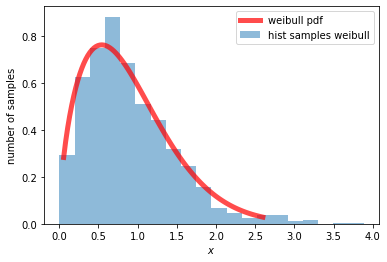

In [137]:
# Параметр для генерации
с = 1.6 # Параметр с > 1, значит распределение принимает вид распределения рэлея

# Генерируем выборку
sampleRange = weibull_min.rvs(с, size=1000)

# Строим гистограмму выборки
plt.hist(sampleRange, density=True, bins=20, alpha=0.5, label='hist samples weibull')
plt.ylabel('number of samples')
plt.xlabel('$x$')

# Рисуем поверх неё теоретическую плотность распределения
left = weibull_min.ppf(0.01, с) # Квантили
right =  weibull_min.ppf(0.99, с)
x = np.linspace(left,  right, 100) 
plt.plot(x, weibull_min.pdf(x, с), 'r-', lw=5, alpha=0.7, label='weibull pdf')
plt.legend(loc='best')

In [128]:
def wF(sizeSamples, Ex, Dx):
    n = sizeSamples
    #Генерируем выборки
    values = np.array([ weibull_min.rvs(с, size=n) for x in range(1000)])
    #Вычисляем выборочные средние
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, density=True, bins=20, alpha=0.5, label='hist mean n ' + str(n))
    
    # Математическое ожидание и sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print ('Математическое ожидание=' , mu)
    print ('sigma=' , sigma)
    # Нормальное распределение
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0.01,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='weibull_min pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

Ex= 0.896574280056598  STD= 0.5737226304237434  DX= 0.32915765666033925
Математическое ожидание= 0.896574280056598
sigma= 0.25657656037149584


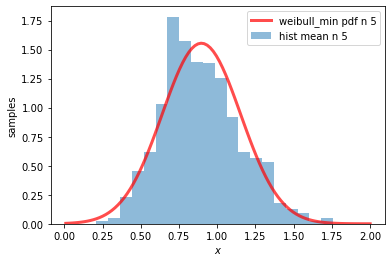

In [129]:
EX = weibull_min.mean(с) #Математическое ожидание
std = weibull_min.std(с) # Среднеквадратическое отклонение
DX = std**2
print ('Ex=', EX, ' STD=', std, ' DX=', DX)

wF(5, EX, DX)

Математическое ожидание= 0.896574280056598
sigma= 0.1814270257322043


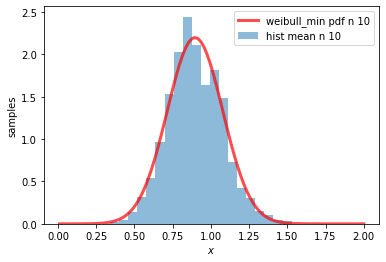

In [124]:
wF(10, EX, DX)

Математическое ожидание= 0.896574280056598
sigma= 0.025657656037149583


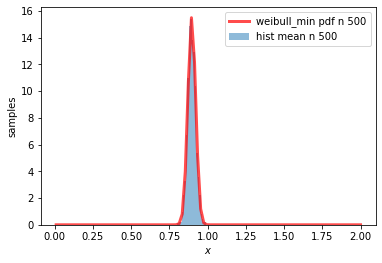

In [138]:
wF(500, EX, DX)

# Вывод

Результат решения задачи демонстрирует утверждение центральной предельной теоремы о том, что распределение выборочных средних случайной величины описывается нормальным распределением, с ростом объема выборок n точность аппроксимации увеличивается.